## **21BCE3801 B. ADITYA PRANAV**

Load the MNIST dataset into your environment (Colab) from the keras dataset.



Importing the data

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess the data
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)).astype('float32') / 255
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)).astype('float32') / 255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 27s 2us/step


Expected: 4


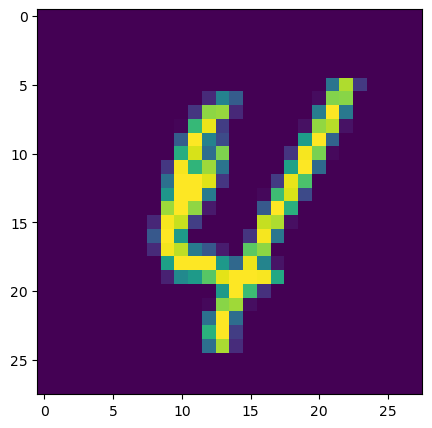

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def expectedres(n):
  plt.figure(figsize=(5,5))
  plt.imshow(train_X[n])
  print("Expected:", np.argmax(train_y[n]))

expectedres(700)

You should have a minimum of 4 convolution layers and 2 max pooling layers. Feel free to add more based on your requirements.
Use the RMSProp optimizer with this configuration: opt2 = keras.optimizers.RMSprop(learning_rate=0.01, rho=0.95).


In [4]:
opt2 = RMSprop(learning_rate=0.01, rho=0.95)
# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))   #CONV1
model.add(Conv2D(64, (3, 3), activation='relu'))                            #CONV2
model.add(MaxPooling2D((2, 2)))                                             #MaxPooling1
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_y, epochs=2, validation_data=(test_X, test_y), batch_size = 32)



Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9007 - loss: 0.5324 - val_accuracy: 0.9770 - val_loss: 0.0741
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9785 - loss: 0.0741 - val_accuracy: 0.9822 - val_loss: 0.0608


Summary of model to verify number of layers

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,399,766 (9.15 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,199,884 (4.58 MB)

In [6]:
predictions = model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Generate the correlation and confusion matrix for analysis.


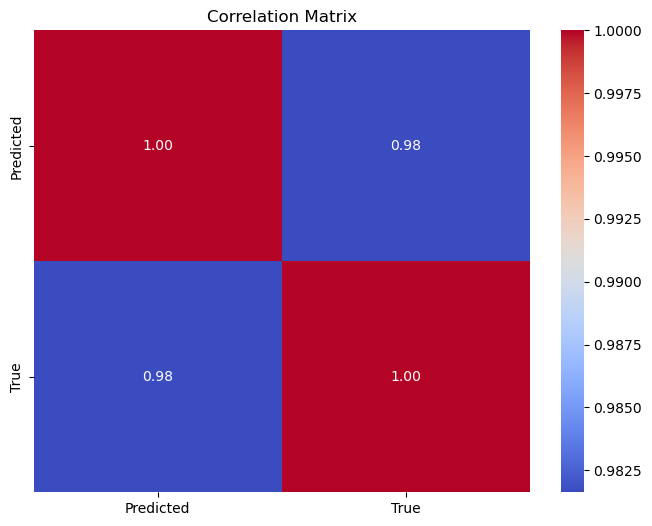

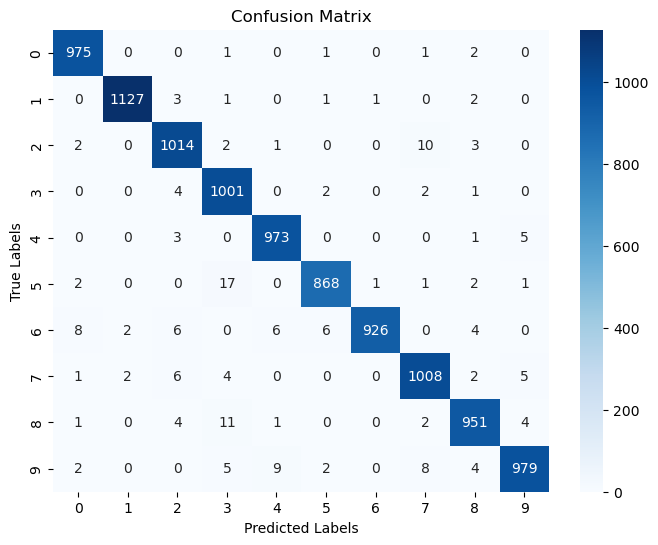

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

# Generate correlation matrix
correlation_matrix = pd.DataFrame({'Predicted': predicted_labels, 'True': true_labels}).corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Generate confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Validate the results with 20 random handwritten images and plot the prediction results.

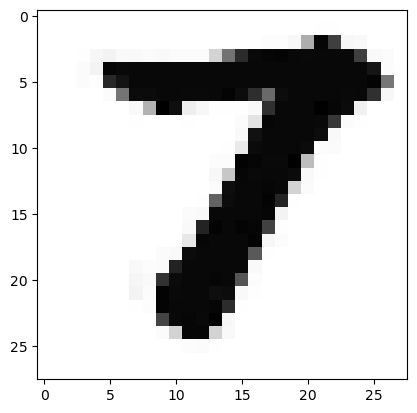

In [14]:
import cv2
imgpath = r"C:\Users\Admin\Desktop\firsttest_cnn_website\testimg_7.png"
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
img = img.reshape(28, 28, 1).astype('float32') / 255.0
plt.imshow(img, cmap = 'gray')
img = np.expand_dims(img, axis=0)

In [15]:
print(model.predict(img))
print(np.argmax(model.predict(img)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.00966305 0.08958116 0.00623525 0.00141372 0.24712624 0.00412008
  0.00351071 0.24759851 0.17796989 0.21278134]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7


In [16]:
model.save(r'C:\Users\Admin\Desktop\firsttest_cnn_website\cnn_number_pred.h5')

## Conclusion
Hence, a deep learning model utilising 4 convulutional and 2 Maxpooling layers has been implemented to classify the MNIST dataset. RMSProp optimizer has been utilised as well.